<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.891 · Aprendizaje automático · PEC2</p>
<p style="margin: 0; text-align:right;">2024-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 2: Impleentación

Implementing unniverse clustering
**Importante:** cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** no olvidéis poner vuestro nombre y apellidos en la siguiente celda.

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong>
</div>

Carlos Toro Peñas

Para la realización de la práctica necesitaremos importar los siguientes módulos:

In [2]:
import math

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from scipy.integrate import quad
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

seed = 42

## Carga del conjunto de datos y preprocesado (1.5 puntos)

Se utilizará un dataset de comentarios de clientes sobre la empresa UPS recopilados de [Yelp](https://www.yelp.com/dataset), contenido en el archivo reviews_ups.txt, donde cada línea es una review. Recuerden que puede haber reviews sin contenido, las cuales deberán ser limpiadas durante el preprocesamiento.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> carga las opiniones del archivo en una lista y elimina aquellas opiniones que estén literalmente vacías.
</div>

Hoy en día, el análisis de texto en lenguaje natural ha sido revolucionado por los Modelos de Lenguaje Grandes (LLMs), los cuales han reemplazado las técnicas clásicas como TF-IDF y Bag of Words para la representación de texto. Estas técnicas clásicas, aunque útiles, eran limitadas al crear representaciones dispersas y poco contextuales de los textos. En cambio, los LLMs permiten generar representaciones densas o embeddings, que capturan de manera mucho más efectiva el significado semántico de las palabras y las relaciones entre ellas.

Para comprender como funcionan los modelos de lenguaje se recomienda el siguiente video que, en el minuto 12, explica visualmente la parte de embeddings (representación vectorial de palabras o frases) que usaremos en la PEC: https://www.youtube.com/watch?v=wjZofJX0v4M

En esta práctica, vamos a crear una representación densa (embedding) de las reviews utilizando MiniLM, un modelo ligero que ofrece una excelente capacidad para generar embeddings de texto manteniendo un balance entre rendimiento y eficiencia computacional. MiniLM está basado en la arquitectura Transformer, similar a otros modelos más grandes como BERT, pero optimizado para ser más pequeño y rápido, lo que lo hace ideal para tareas como la nuestra. En concreto, utilizaremos la versión "all-MiniLM-L6-v2", que puedes descargar comprimida en un fichero zip desde el siguiente enlace: https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/v0.2/all-MiniLM-L6-v2.zip

Una vez descargado el archivo, debes descomprimirlo y colocar el directorio extraído en el mismo directorio donde se encuentra este notebook, para facilitar su carga.

Para cargar el modelo, utilizaremos la biblioteca sentence-transformers, la cual es una herramienta que facilita el uso de modelos preentrenados para la generación de embeddings de texto. Esta biblioteca está construida sobre modelos como BERT, MiniLM, y otros, y nos permite, con unas pocas líneas de código, transformar frases y textos en representaciones vectoriales de alta calidad. Aquí puedes encontrar más documentación sobre sentence-transformers y el modelo en concreto de MiniLM: https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

Al tener el modelo descargado en local sólo es necesario indicar el nombre del directorio descomprimido donde se encuentra el modelo (que coincide con el nombre del modelo).

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> carga el modelo de MiniLM y crea el embedding para la frase "Estoy resolviendo la PEC 2"
</div>

## Reducción de dimensionalidad (2.5 puntos)

El embedding generado por el modelo tiene una alta dimensionalidad. Aunque esta representación es ideal para capturar relaciones semánticas complejas entre frases, es difícil de interpretar y visualizar directamente debido a la alta cantidad de dimensiones.

Para poder visualizar los embeddings y entender mejor cómo se agrupan las reviews similares, necesitamos reducir la dimensionalidad del espacio a algo más manejable, como 2 dimensiones. Al hacerlo, podemos representar gráficamente las frases en un plano, lo que nos permitirá identificar patrones, clusters de frases similares y relaciones entre diferentes opiniones.

En cuanto a la visualización, dado que tenemos miles de puntos (uno por cada embedding generado), es importante asegurarnos de que el gráfico no se vuelva confuso o demasiado saturado. Para ello, utilizaremos un `scatter` plot de Matplotlib y aprovecharemos el parámetro `alpha=0.1`, el cual ajusta la transparencia de los puntos en el gráfico. Esto nos permitirá visualizar claramente las áreas más densas, ya que donde haya una mayor concentración de puntos, estos se superpondrán y se verán más oscuros, facilitando la identificación de zonas con alta densidad de opiniones similares.

### PCA (Principal Component Analysis)
PCA encuentra las direcciones de mayor varianza en los datos y proyecta los puntos hacia esas direcciones. Es rápida y eficiente, pero cuidado porque en algunos casos puede no capturar bien las relaciones no lineales presentes en los embeddings.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong> reduce a 2 dimensiones cada una de las reviews y visualiza el resultado donde el color de cada punto se corresponda con las estrellas de esa review. Añade una leyenda para poder interpretar los colores.
</div>

In [3]:
filename = 'C:/desarrollo/git/uoc/tfm/data/2dfgrs-title-dist.csv'
dt = pd.read_csv(filename, encoding="ISO-8859-1")

print(dt.head())

   Unnamed: 0  X  SEQNUM  OSEQNUM        NAME  UKST  RA1950.h  RA1950.m  \
0           1  1       1        2  TGS436Z001   349         0        11   
1           2  2       2        1  TGS496Z001   349         0        11   
2           3  3       3        1  TGS435Z001   349         0        11   
3           4  4       4        1  TGS436Z002   349         0        11   
4           5  5       5        1  TGS435Z002   349         0        11   

   RA1950.s  DE1950.d  ...   Z_EMI  NMBEST   SNR      ETA        dec  \
0     55.72       -32  ...  0.2984       1   3.8 -99.9000 -32.270722   
1     59.29       -33  ... -9.9990       0  47.6  -2.5892 -32.966861   
2     49.37       -32  ...  0.1032       1  28.4  -2.4650 -32.388000   
3     53.15       -32  ...  0.2066       1   2.5 -99.9000 -32.496556   
4     54.63       -32  ...  0.1037       2  17.5  -0.3278 -32.711528   

         ra      dist         x         y         z  
0  3.612708  0.277234  0.233945  0.014771 -0.148021  
1  3.627

A contunuación, resringimos los datos a una area concreta del cielo y a una prundidad de distancia z < 0.3

<Axes: ylabel='redshift'>

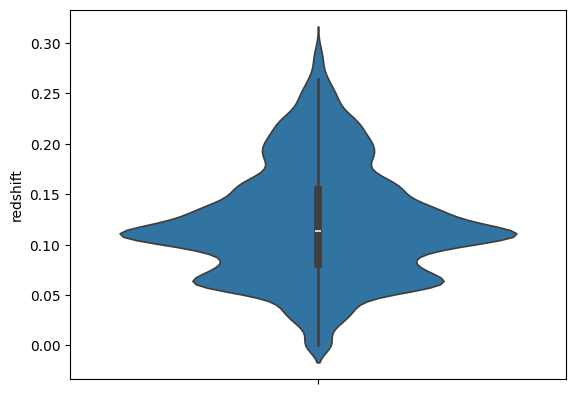

In [4]:
dt_sample3 = dt[(dt['RAh'] <= 1) & (dt['RAh'] >= 0) & (dt['Ded'] >= -29) & (dt['Ded'] <= -27)]
dt_sample3 = dt_sample3[dt_sample3['Z'] < 0.3]
dt_sample3 = dt_sample3.rename(columns={'Z': 'redshift', 'SEQNUM': 'ID_2DF'})

dt_sample3 = dt_sample3[['ID_2DF', 'x', 'y', 'z', 'redshift', "dist"]]

sns.violinplot(y=dt_sample3["redshift"])

Leemos el dataset de grupos de galaxias y lo mergeamos con el galaxias qeu ya tenemos

In [5]:
dt_groups = pd.read_csv('C:/desarrollo/git/uoc/tfm/data/group_members.csv')
result = pd.merge(dt_sample3, dt_groups, how="inner", on=[ "ID_2DF"])
print(result.head())
X = dt_sample3[[ 'x', 'y', 'z']]

   ID_2DF         x         y         z  redshift      dist  GROUP_ID  GAL_ID
0   63517  0.128330  0.007831 -0.066596    0.1500  0.144793      1062   22393
1   63518  0.124006  0.007586 -0.065436    0.1453  0.140417     22356   22394
2   63519  0.080105  0.004883 -0.041904    0.0925  0.090535     22357   22395
3   63523  0.105900  0.006476 -0.057030    0.1240  0.120454     22358   22398
4   63525  0.073718  0.004478 -0.039239    0.0853  0.083631      2857   22400


Aplicamos OPTICS a este dataset:

In [6]:
print(dt_sample3.head())

       ID_2DF         x         y         z  redshift      dist
34736   63517  0.128330  0.007831 -0.066596    0.1500  0.144793
34737   63518  0.124006  0.007586 -0.065436    0.1453  0.140417
34738   63519  0.080105  0.004883 -0.041904    0.0925  0.090535
34739   63521  0.074488  0.004536 -0.039216    0.0860  0.084303
34740   63522  0.051526  0.003152 -0.027512    0.0593  0.058496


In [12]:
clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=5)
clust.fit(X)



,min_samples,5
,max_eps,inf
,metric,'minkowski'
,p,2
,metric_params,None
,cluster_method,'xi'
,eps,None
,xi,0.05
,predecessor_correction,True
,min_cluster_size,5
,algorithm,'auto'


In [21]:
labels1 = cluster_optics_dbscan(reachability = clust.reachability_,
                                    core_distances = clust.core_distances_,
                                    ordering = clust.ordering_, eps =0.00035)

n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_noise_ = list(labels1).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 122
Estimated number of noise points: 11794


In [22]:
dt_sample3['cluster_id'] =  labels1

Sacamos unas gráficas:

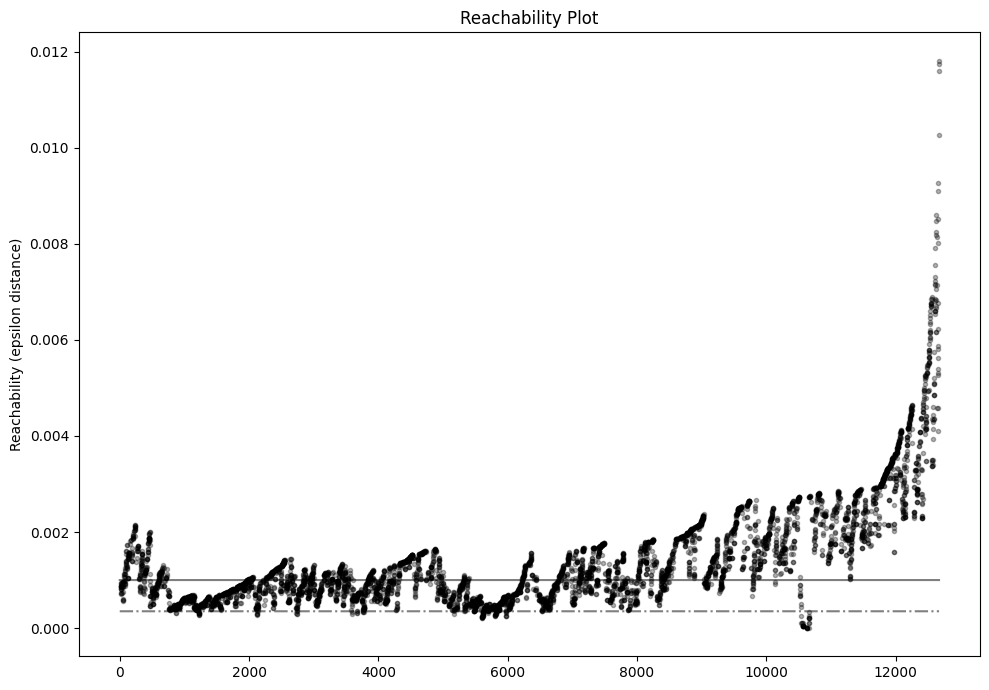

ENDDD


In [24]:
space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(1,1)
ax1 = plt.subplot(G[0, :])
#ax2 = plt.subplot(G[1, 0])
#ax2 = plt.subplot(G[1, 0])
#ax3 = plt.subplot(G[1, 1])
#ax4 = plt.subplot(G[1, 2])

colors = ["g.", "r.", "b.", "y.", "c."]
colors = cm.rainbow(np.linspace(0, 1, len(labels)))
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    #ax1.plot(Xk, Rk, color, alpha=0.3)

ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 0.001, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.00035, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = X[clust.labels_ == klass]
#    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)

#ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
#ax2.set_title("Automatic Clustering\nOPTICS")


plt.tight_layout()
plt.show()
print("ENDDD")

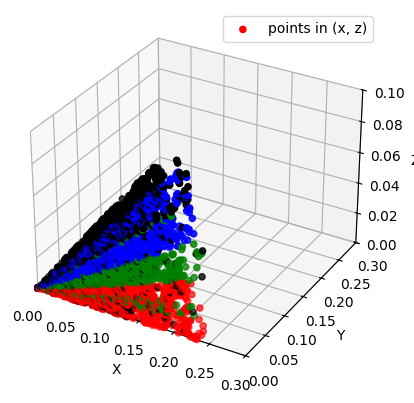

In [25]:


ax = plt.figure().add_subplot(projection='3d')


# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = X['x']
y = X['y']
z = X['z']
c_list = []
for c in colors:
    c_list.extend([c] * 3168)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

ax.legend()
ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.3)
ax.set_zlim(0, 0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

C:\Users\carlo\AppData\Local\Temp\ipykernel_13692\1820253536.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xs = fila[0]
C:\Users\carlo\AppData\Local\Temp\ipykernel_13692\1820253536.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ys = fila[1]
C:\Users\carlo\AppData\Local\Temp\ipykernel_13692\1820253536.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zs = fila[2]


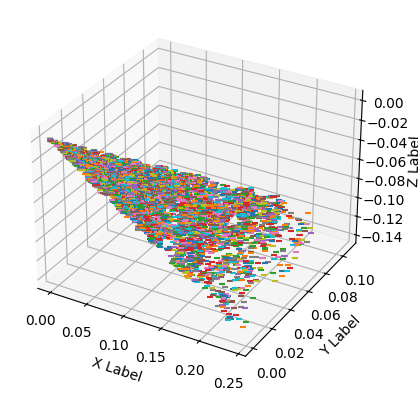

In [26]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
m=0
i = 0
for indice_fila, fila in X.iterrows():
    xs = fila[0]
    ys = fila[1]
    zs = fila[2]
    i=i+1
   
    ax.scatter(xs, ys, zs, marker=m)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

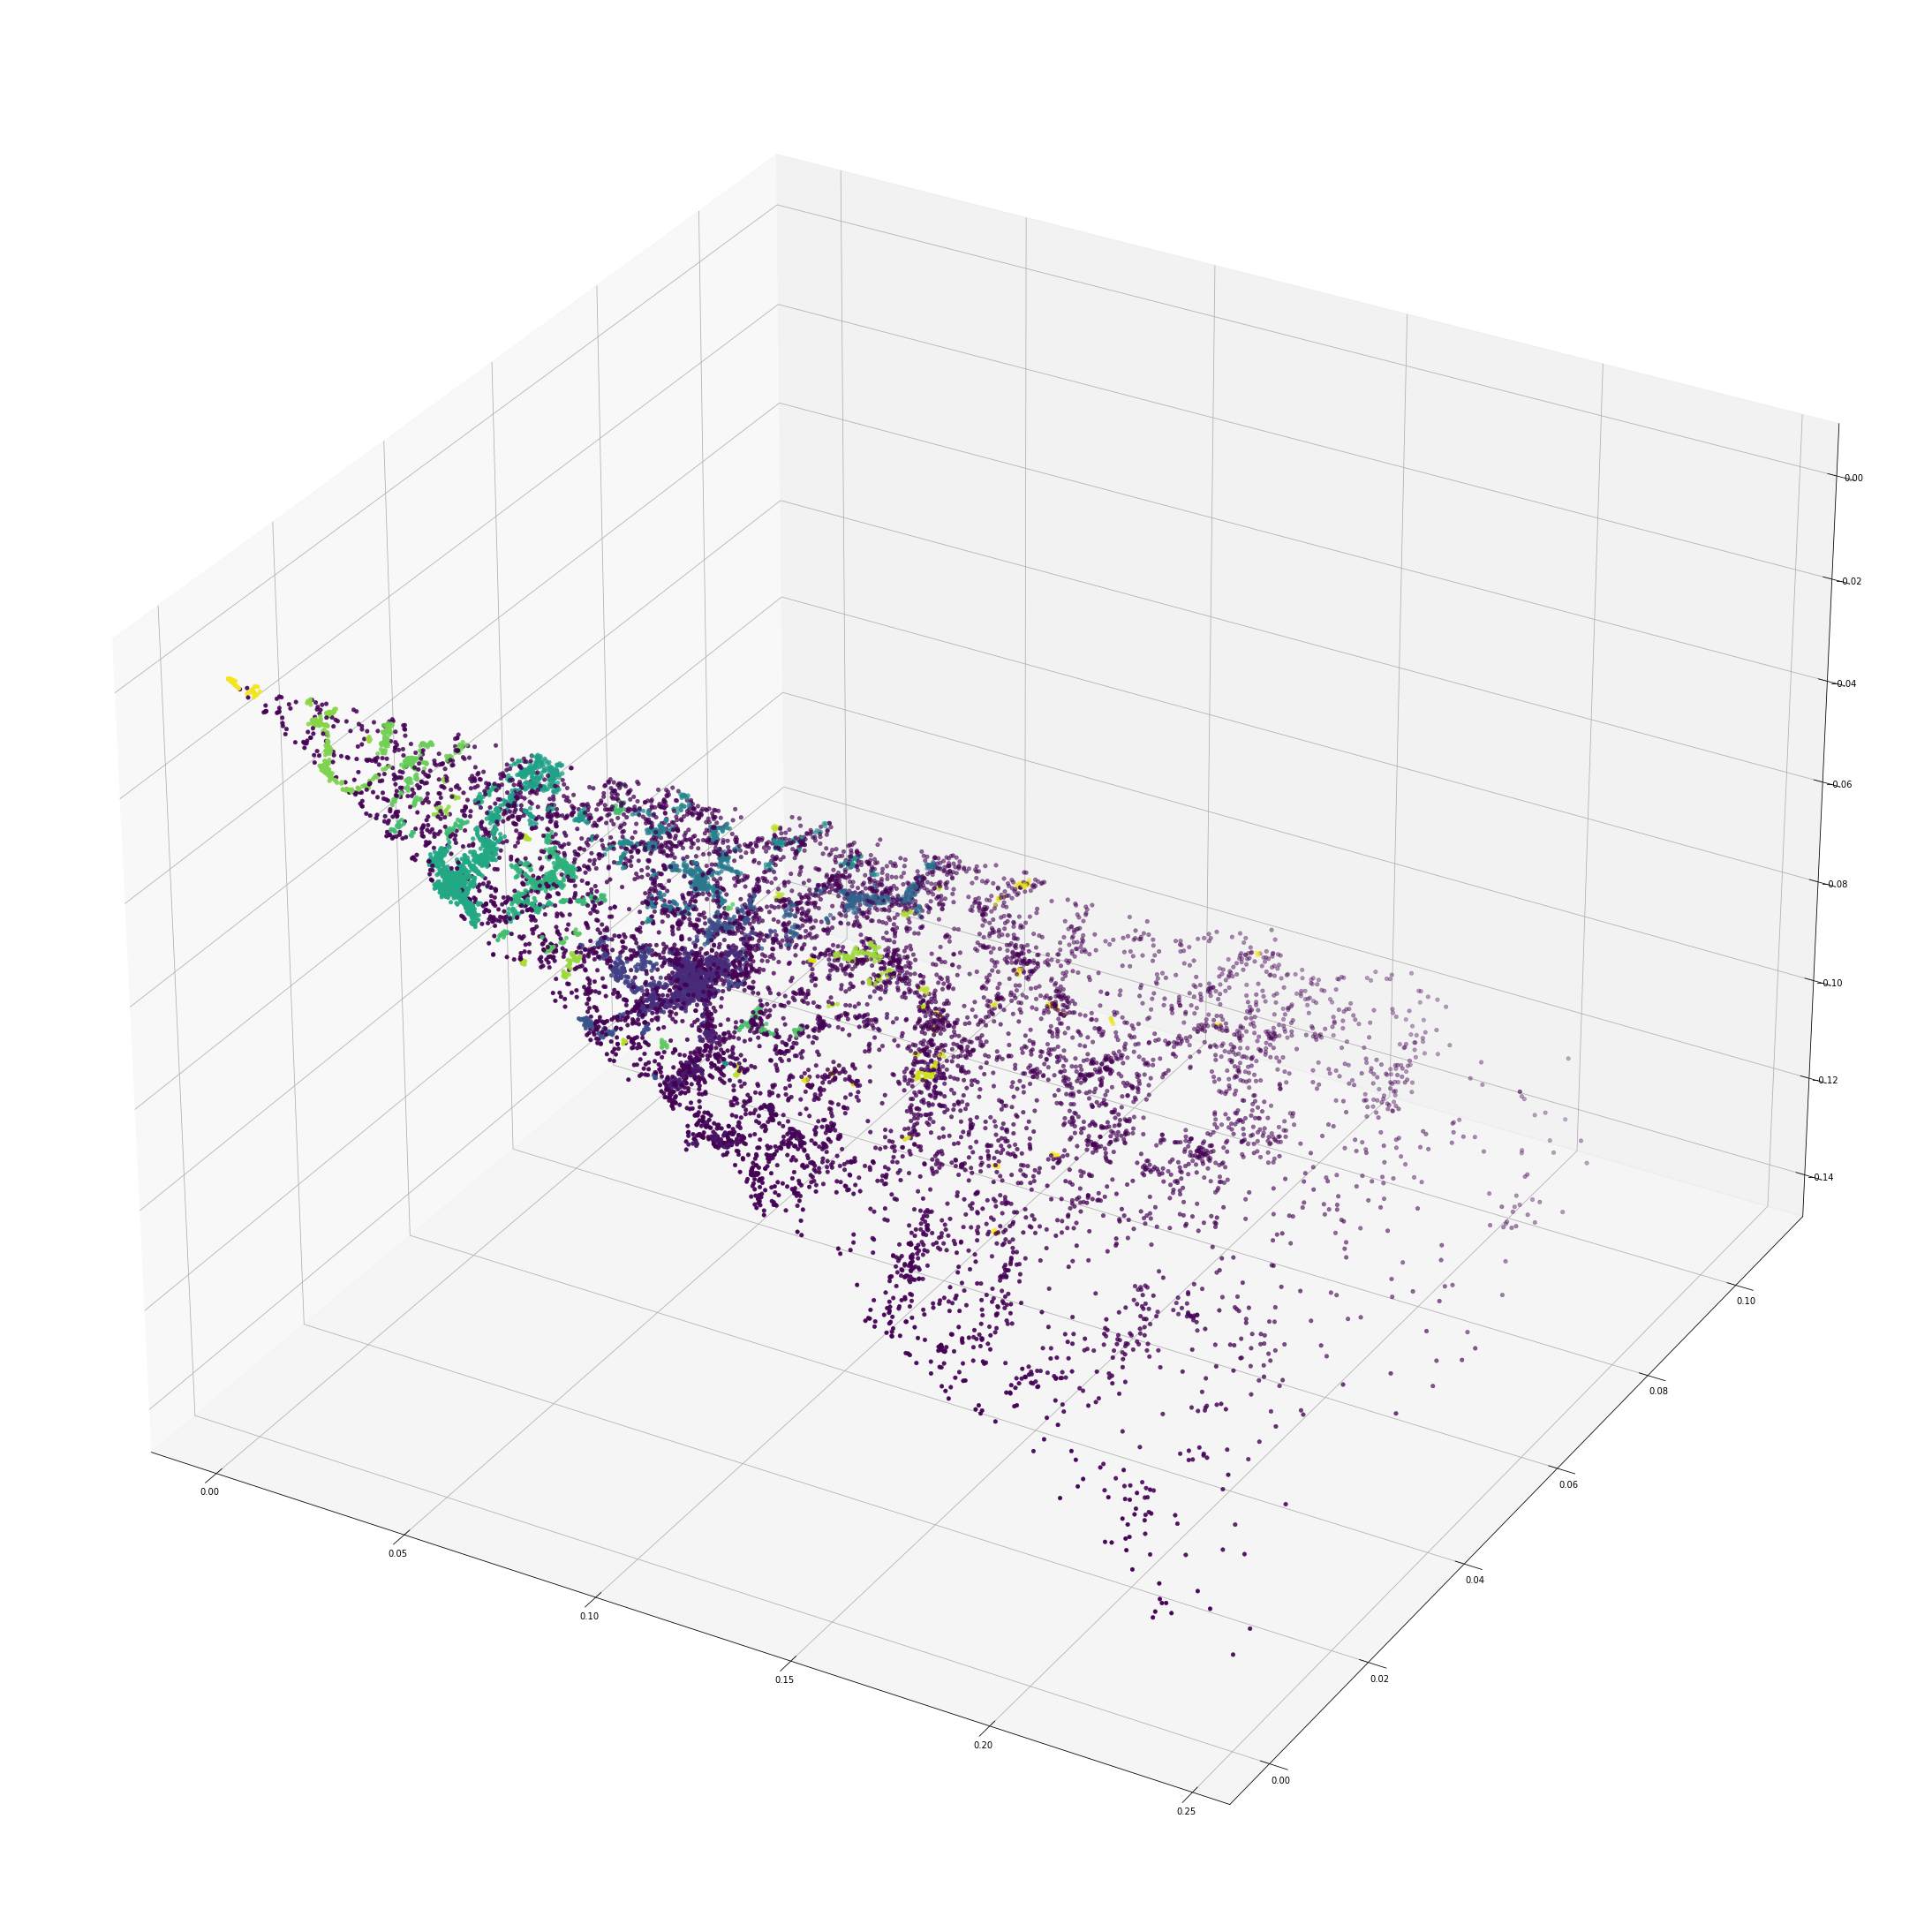

In [52]:
plt.figure(figsize=(40, 40))
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=labels1, cmap='viridis', linewidth=0.5)